In [8]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [11]:
df =pd.read_csv('employeeChurnPrediction - Sheet1.csv')

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
warnings.filterwarnings('ignore')


In [14]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [15]:
df.rename(columns={'Departments ':'departments'},inplace=True)


In [17]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

### Determine the Structure of Our Dataset (Counting the Number of Rows and Columns)

In [18]:
df.shape


(14999, 10)

### Gather Insights on Our Dataset, Unveiling Details such as the Total Number of Rows, Total Columns, Data Types for Each Column, and the Memory Consumption.








In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Obtain Comprehensive Statistical Insights for the Dataset.








In [21]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Examine the Presence of Null Values in the Dataset.








In [22]:
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

### Addressing Duplicate Entries if any 

In [24]:
df.duplicated().any()


True

In [25]:
df[df.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [26]:
df = df.drop_duplicates()


In [27]:
df.shape


(11991, 10)

In [28]:
14999 - 11991


3008

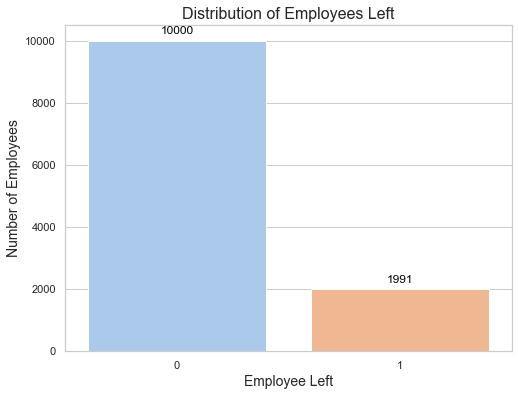

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a bar plot for 'left' values
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Use Seaborn countplot
ax = sns.countplot(x='left', data=df, palette="pastel")

# Add labels and title
plt.xlabel("Employee Left", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.title("Distribution of Employees Left", fontsize=16)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=12,  # Adjust font size
        color='black'  # Label text color
    )

# Show the plot
plt.show()


## Store the feature matrix as X and the response (target) as the vector y.
Storing the feature matrix as X and the response (target) as the vector y is a common convention in machine learning and data analysis. This convention is followed for clarity, consistency, and ease of understanding. Here's why we do this:

1. **Consistency:** Using consistent variable names across different tasks and projects enhances readability and understanding. It establishes a standardized practice that makes the code more accessible to others and to your future self.

2. **Convention:** The convention of using X for features and y for the target variable is widely adopted in the machine learning community. Adhering to established conventions facilitates collaboration and code sharing.

3. **Clarity:** Naming variables descriptively, such as X for features and y for the target, helps in understanding the purpose of each variable. It makes the code more self-explanatory and reduces the need for comments.

4. **Compatibility:** Many machine learning libraries and functions expect input in the form of X for features and y for the target. Following this convention ensures compatibility with various tools and frameworks.

5. **Readability:** When reviewing or revisiting the code, having consistent and meaningful variable names simplifies the process of understanding the structure and purpose of the data.

In summary, storing the feature matrix in X and the response in y is a practice that promotes clarity, consistency, and compatibility, making your code more readable and understandable.

In [34]:
X = df.drop(columns=['left'])


In [35]:
y = df['left']


In [36]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

## Column Transformer and Pipeline


In [37]:
df.head(1)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['Departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

Let's break down the provided code for creating a `ColumnTransformer`:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define the preprocessing steps for numerical, nominal, and ordinal features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [
            'satisfaction_level',
            'last_evaluation',
            'number_project',
            'average_montly_hours',
            'time_spend_company',
            'Work_accident',
            'promotion_last_5years'
        ]),
        ('nominal', OneHotEncoder(), ['departments']),
        ('ordinal', OrdinalEncoder(), ['salary'])
    ],
    remainder='passthrough'  # Pass through any remaining columns without transformation
)
```

Explanation:

1. **Numerical Features (num):**
   - `StandardScaler()` is used to standardize (scale) the numerical features. It subtracts the mean and scales to unit variance.
   - The specified numerical columns are: 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'.

2. **Nominal Features (nominal):**
   - `OneHotEncoder()` is applied to the 'departments' column. It performs one-hot encoding, converting categorical variables into binary vectors.

3. **Ordinal Features (ordinal):**
   - `OrdinalEncoder()` is used for the 'salary' column, encoding ordinal categorical features into integer values.

4. **`remainder='passthrough'`:**
   - This parameter ensures that any remaining columns not specified in the transformers will be passed through without any transformation. It is set to 'passthrough' in this case.

The `ColumnTransformer` is a powerful tool to apply different preprocessing steps to various subsets of columns within your dataset. It helps organize and consolidate these transformations, making your preprocessing pipeline more efficient and maintainable. This specific `ColumnTransformer` is suitable for handling a mix of numerical, nominal, and ordinal features in a machine learning dataset.

In [49]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
    
])

The provided code creates a machine learning pipeline using the `Pipeline` class from scikit-learn. Let's break down the code:

```python
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline with preprocessing and modeling steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 'preprocessor' is the name given to the ColumnTransformer
    ('model', LogisticRegression())  # 'model' is the name given to the Logistic Regression model
])
```

Explanation:

1. **`('preprocessor', preprocessor)` - Preprocessing Step:**
   - The first element in each tuple is a string identifier ('preprocessor'), which serves as a name for this specific step in the pipeline.
   - The second element is the preprocessor itself (`preprocessor`), which is a `ColumnTransformer` in this case. This transformer encapsulates various preprocessing steps for different types of features (numerical, nominal, and ordinal).

2. **`('model', LogisticRegression())` - Modeling Step:**
   - The second element in the second tuple is another string identifier ('model'), representing the modeling step in the pipeline.
   - The second element is an instance of the `LogisticRegression` model. This is the model that will be trained and used for making predictions.

By using a pipeline, you can encapsulate multiple steps, including preprocessing and modeling, into a single object. This offers several advantages:

- **Convenience:** The entire workflow, from preprocessing to modeling, is encapsulated in a single object, making it convenient to fit and predict.
  
- **Consistency:** The pipeline ensures that the same preprocessing steps are applied consistently during both training and prediction.

- **Readability:** The code becomes more readable and concise, as the entire workflow is expressed in a sequential and organized manner.

You can then use the pipeline to fit the model and make predictions in a streamlined fashion:

```python
# Fit the entire pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Make predictions on new data
predictions = pipeline.predict(X_test)
```

This approach simplifies the code and helps maintain a clean and organized machine learning workflow.

In [50]:
from sklearn import set_config


In [51]:
set_config(display='diagram')


In [52]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

### Splitting The Dataset Into The Training Set And Test Set


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)


In [54]:
print(X_train.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')


In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [56]:
y_pred = pipeline.predict(X_test)


In [57]:
accuracy_score(y_test,y_pred)


0.8370154230929554

In [58]:
precision_score(y_test,y_pred)


0.5209580838323353

In [59]:
recall_score(y_test,y_pred)


0.2185929648241206

In [60]:
def model_scorer(model_name,model):
    
    output=[]
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(accuracy_score(y_test,y_pred))
    
    output.append(precision_score(y_test,y_pred))
    
    output.append(recall_score(y_test,y_pred))
    
    return output

Let's break down each line of the provided code:

```python
def model_scorer(model_name, model):
```
- **Line 1:** Defines a function named `model_scorer` that takes two parameters - `model_name` (a string representing the name of the model) and `model` (the machine learning model to be evaluated).

```python
    output = []
```
- **Line 3:** Initializes an empty list named `output`. This list will be used to store the results of the model evaluation.

```python
    output.append(model_name)
```
- **Line 5:** Appends the `model_name` to the `output` list. This is the first element in the list.

```python
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
```
- **Line 7-9:** Creates a scikit-learn pipeline named `pipeline`. This pipeline consists of two steps:
  - `'preprocessor'`: The data preprocessing step, assumed to be defined elsewhere in the code as `preprocessor`.
  - `'model'`: The machine learning model provided as an argument.

```python
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
```
- **Line 11:** Splits the dataset (`X` and `y`) into training and testing sets using `train_test_split`.
  - `X_train`: Training data features
  - `X_test`: Testing data features
  - `y_train`: Training data labels
  - `y_test`: Testing data labels
  - `test_size=0.20`: Allocates 20% of the data for testing.
  - `random_state=42`: Sets a seed for reproducibility.
  - `stratify=y`: Ensures that the class distribution is maintained in the split.

```python
    pipeline.fit(X_train, y_train)
```
- **Line 13:** Fits the pipeline on the training data (`X_train` and `y_train`). This involves applying the preprocessing steps and training the machine learning model.

```python
    y_pred = pipeline.predict(X_test)
```
- **Line 15:** Uses the trained pipeline to make predictions (`y_pred`) on the test data (`X_test`).

```python
    output.append(accuracy_score(y_test, y_pred))
    output.append(precision_score(y_test, y_pred))
    output.append(recall_score(y_test, y_pred))
```
- **Line 17-19:** Appends three performance metrics to the `output` list:
  - Accuracy: The proportion of correctly classified instances.
  - Precision: The proportion of true positives among instances predicted as positive.
  - Recall: The proportion of true positives among actual positive instances.

```python
    return output
```
- **Line 21:** Returns the `output` list, which contains the model name and the corresponding performance metrics.

In summary, this function evaluates the performance of a given machine learning model (`model`) by fitting it into a pipeline with a specified preprocessing step (`preprocessor`). It then computes and returns a list of results, including the model name and three performance metrics.

This is a Python function named `model_scorer` that evaluates the performance of a machine learning model. Let's break down what each part of the function does:

Explanation:

1. **Function Parameters:**
   - `model_name`: A string representing the name of the model. This is used to identify the model in the output list.
   - `model`: The machine learning model to be evaluated.

2. **Output List:**
   - `output` is a list that will store the results of model evaluation. It starts with the model name.

3. **Pipeline Creation:**
   - A scikit-learn pipeline is created with two steps:
     - `'preprocessor'`: The data preprocessing step (assumed to be defined elsewhere in the code as `preprocessor`).
     - `'model'`: The machine learning model provided as an argument.

4. **Data Splitting:**
   - The dataset (`X` and `y`) is split into training and testing sets using `train_test_split`.

5. **Model Fitting:**
   - The pipeline is fitted on the training data.

6. **Prediction:**
   - The model is used to make predictions on the test data.

7. **Performance Metrics:**
   - Three performance metrics are calculated and appended to the `output` list:
     - Accuracy
     - Precision
     - Recall

8. **Output:**
   - The function returns the `output` list containing the model name and its corresponding performance metrics.

This function allows you to evaluate different machine learning models and compare their performance using metrics such as accuracy, precision, and recall.

In [61]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}

In [62]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [63]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9683201333889121, 0.8870192307692307, 0.9271356783919598],
 ['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

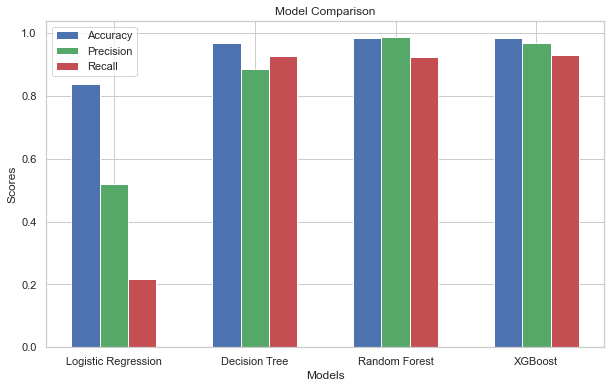

In [86]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# List of accuracy scores
accuracy_scores = [0.8370154230929554, 0.9683201333889121, 0.9858274280950396, 0.9837432263443101]

# List of precision scores
precision_scores = [0.5209580838323353, 0.8870192307692307, 0.989247311827957, 0.9686684073107049]

# List of recall scores
recall_scores = [0.2185929648241206, 0.9271356783919598, 0.9246231155778895, 0.9321608040201005]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(model_names))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy', color='b', align='center')
bar2 = ax.bar([i + bar_width for i in index], precision_scores, bar_width, label='Precision', color='g', align='center')
bar3 = ax.bar([i + 2 * bar_width for i in index], recall_scores, bar_width, label='Recall', color='r', align='center')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(model_names)
ax.legend()

plt.show()


The output you provided appears to be a list of lists, where each inner list represents the evaluation results for a specific machine learning model. Let's break down the structure of each inner list:

- **First Inner List (`['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206]`):**
  - `'log'`: Model name (Logistic Regression).
  - `0.8370154230929554`: Accuracy score.
  - `0.5209580838323353`: Precision score.
  - `0.2185929648241206`: Recall score.

- **Second Inner List (`['decision_tree', 0.9683201333889121, 0.8870192307692307, 0.9271356783919598]`):**
  - `'decision_tree'`: Model name (Decision Tree Classifier).
  - `0.9683201333889121`: Accuracy score.
  - `0.8870192307692307`: Precision score.
  - `0.9271356783919598`: Recall score.

- **Third Inner List (`['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895]`):**
  - `'random_forest'`: Model name (Random Forest Classifier).
  - `0.9858274280950396`: Accuracy score.
  - `0.989247311827957`: Precision score.
  - `0.9246231155778895`: Recall score.

- **Fourth Inner List (`['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]`):**
  - `'XGB'`: Model name (XGBoost Classifier).
  - `0.9837432263443101`: Accuracy score.
  - `0.9686684073107049`: Precision score.
  - `0.9321608040201005`: Recall score.

Each inner list provides a summary of the evaluation results for a specific model, including accuracy, precision, and recall scores. These metrics are commonly used to assess the performance of classification models. If you have any specific questions or if there's anything specific you'd like to analyze or discuss regarding these results, feel free to let me know!

In [73]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['Departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [74]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
    
])

In [75]:
pipeline.fit(X,y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['Departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [78]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'Departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [79]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### Save The Model


In [80]:
import pickle


In [81]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [82]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [83]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


In [ ]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)

    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = str(clicked.get())
    p9 = str(clicked1.get())

    sample = pd.DataFrame({
        'satisfaction_level': [p1],
        'last_evaluation': [p2],
        'number_project': [p3],
        'average_montly_hours': [p4],
        'time_spend_company': [p5],
        'Work_accident': [p6],
        'promotion_last_5years': [p7],
        'departments': [p8],
        'salary': [p9]
    })

    result = pipeline.predict(sample)
    print(result)
    
    if result == 1:
        Label(master, text="An employee may leave the organization.").grid(row=31)
    else:
        Label(master, text="An employee may stay with the organization.").grid(row=31)

        
    
master =Tk()
master.title("Predicting Employee Churn Using Machine Learning")
label = Label(master,text = "Status of Employee Churn",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Employee satisfaction level").grid(row=1)
Label(master,text = "Last evaluation score").grid(row=2)
Label(master,text = "Number of projects assigned to").grid(row=3)
Label(master,text = "Average monthly hours worked").grid(row=4)
Label(master,text = "Time spent at the company").grid(row=5)
Label(master,text = "Whether they have had a work accident (1= Yes, 0 = No)").grid(row=6)
Label(master,text = "Whether they have had a promotion in the last 5 years (1 = Yes, 0 = No)").grid(row=7)
Label(master,text = "Department name").grid(row=8)
Label(master,text = "Salary category").grid(row=9)


clicked = StringVar()
options = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing',
       'RandD', 'accounting', 'hr', 'management']

clicked1 = StringVar()
options1 = ['low', 'medium', 'high']

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
# e8 = Entry(master)
e8 = OptionMenu(master , clicked , *options )
e8.configure(width=15)

# e9 = Entry(master)
e9 = OptionMenu(master , clicked1 , *options1 )
e9.configure(width=15)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()

In [84]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath=filedialog.askopenfilename(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            data.columns = data.columns.str.replace('\n', '')
            data.rename(columns={'Departments ':'departments'},inplace=True)
            data = data.drop_duplicates()
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            print(f"Failed to open file {e}")
            
def process_data(data):
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
    
    result=pipeline.predict(data)
    
    y_pred = ["An employee may leave the organization." if pred == 1 
              else "An employee may stay with the organization." 
              for pred in result]
        
    data['Predicted_target']=y_pred
    save_file(data)

def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
            
    
# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()